<a href="https://colab.research.google.com/github/invest41/Exploring_Libraries/blob/main/Microsoft_Hummingbird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hummingbird-ml

     |████████████████████████████████| 180 kB 5.2 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 12.7 MB 87 kB/s 


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.ticker as ticker, seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score as ASC
from hummingbird.ml import convert, load

import torch
import hummingbird as hb

In [ ]:
dir(hb.ml)

['ONNXContainer',
 'TVMContainer',
 'TorchContainer',
 '_Constants',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_executor',
 '_parse',
 '_topology',
 '_utils',
 'backends',
 'constants',
 'containers',
 'convert',
 'convert_batch',
 'exceptions',
 'hummingbird_constants',
 'load',
 'operator_converters',
 'supported']

In [ ]:
# Create some random data for binary classification
num_classes = 2



np.random.seed(18)
X = np.random.rand(100_000, 28)
y = np.random.randint(num_classes, size=100_000)

In [ ]:
col = [ i+1 for i in range(X.shape[1])]
df = pd.DataFrame(X, columns = col)
df['target'] = pd.Series(y, df.index)
df.sample(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,target
58030,0.509306,0.309460,0.136162,0.463533,0.182639,0.421700,0.494604,0.140582,0.557356,0.731283,0.813837,0.572676,0.798167,0.203871,0.336443,0.874781,0.202415,0.306103,0.707403,0.306690,0.144311,0.579275,0.090122,0.714468,0.970545,0.371024,0.153294,0.076586,1
29499,0.324842,0.716733,0.985735,0.145307,0.975217,0.431713,0.025791,0.501216,0.975642,0.432786,0.235367,0.228588,0.625462,0.350148,0.105938,0.955297,0.323860,0.329444,0.074368,0.413282,0.923083,0.436089,0.999435,0.462639,0.651028,0.758676,0.019274,0.599065,0
42564,0.069443,0.584176,0.664161,0.562757,0.410460,0.018172,0.968356,0.873573,0.343539,0.413984,0.370088,0.530297,0.660802,0.769250,0.803904,0.475378,0.100462,0.994023,0.382855,0.630641,0.284757,0.348805,0.342267,0.953424,0.052146,0.186279,0.608389,0.646321,0
77771,0.768113,0.827082,0.008753,0.587753,0.921623,0.053673,0.385518,0.926913,0.898564,0.287607,0.620952,0.371222,0.614259,0.292785,0.054885,0.578959,0.818970,0.719935,0.651923,0.332375,0.039355,0.970529,0.566109,0.407533,0.150821,0.761267,0.298637,0.730717,1
31738,0.244392,0.786761,0.178651,0.806747,0.395994,0.235520,0.239563,0.946847,0.860676,0.662193,0.925695,0.071632,0.343973,0.744561,0.285105,0.966814,0.745958,0.152283,0.858560,0.629789,0.001133,0.782555,0.015220,0.028483,0.864982,0.390027,0.272450,0.407287,1


In [ ]:

#Basic info on randomly generated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   1       100000 non-null  float64
 1   2       100000 non-null  float64
 2   3       100000 non-null  float64
 3   4       100000 non-null  float64
 4   5       100000 non-null  float64
 5   6       100000 non-null  float64
 6   7       100000 non-null  float64
 7   8       100000 non-null  float64
 8   9       100000 non-null  float64
 9   10      100000 non-null  float64
 10  11      100000 non-null  float64
 11  12      100000 non-null  float64
 12  13      100000 non-null  float64
 13  14      100000 non-null  float64
 14  15      100000 non-null  float64
 15  16      100000 non-null  float64
 16  17      100000 non-null  float64
 17  18      100000 non-null  float64
 18  19      100000 non-null  float64
 19  20      100000 non-null  float64
 20  21      100000 non-null  float64
 21  22      100

In [ ]:

#Descriptive statistics on randomly generated dataset
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,target
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.501500,0.498176,0.501600,4.998625e-01,0.499539,0.500293,0.499984,0.500521,0.499050,0.498902,0.500035,0.500364,0.500649,0.499937,0.499377,0.498358,0.499787,5.004940e-01,0.500234,0.501461,0.499572,0.499799,0.499109,0.499046,4.988850e-01,0.499363,0.499894,0.500563,0.500220
std,0.289164,0.288726,0.288992,2.882658e-01,0.288261,0.288836,0.288759,0.288927,0.288684,0.288727,0.288388,0.287823,0.288923,0.289461,0.288700,0.288949,0.288651,2.889841e-01,0.288757,0.288204,0.289143,0.288509,0.288504,0.288795,2.889407e-01,0.288929,0.287925,0.288198,0.500002
min,0.000015,0.000006,0.000012,6.329129e-07,0.000030,0.000011,0.000007,0.000003,0.000015,0.000009,0.000013,0.000006,0.000041,0.000021,0.000003,0.000011,0.000008,3.351556e-07,0.000006,0.000010,0.000012,0.000004,0.000009,0.000023,4.636846e-07,0.000020,0.000012,0.000001,0.000000
25%,0.250701,0.247267,0.252114,2.503264e-01,0.250179,0.249866,0.250262,0.249535,0.248743,0.249067,0.250431,0.251792,0.250200,0.248571,0.249103,0.248200,0.250537,2.505036e-01,0.251379,0.252892,0.248365,0.249839,0.249609,0.250038,2.464975e-01,0.249116,0.250221,0.252328,0.000000
50%,0.501060,0.498407,0.503151,4.995853e-01,0.499510,0.500734,0.499276,0.501309,0.498596,0.497907,0.499984,0.500679,0.501265,0.500410,0.500226,0.497559,0.500848,5.013503e-01,0.499504,0.501708,0.499485,0.499032,0.498468,0.497806,4.996545e-01,0.498762,0.500396,0.501494,1.000000
75%,0.753348,0.747595,0.750790,7.493773e-01,0.748214,0.750006,0.749108,0.751664,0.749475,0.748869,0.749847,0.748236,0.749590,0.751861,0.749023,0.748662,0.749868,7.514010e-01,0.749686,0.751541,0.750349,0.749347,0.748939,0.749473,7.481846e-01,0.750502,0.748708,0.749945,1.000000
max,0.999999,0.999980,0.999990,9.999812e-01,0.999992,0.999972,0.999999,0.999995,0.999998,0.999989,0.999962,0.999979,0.999975,0.999985,0.999998,0.999999,0.999996,9.999904e-01,0.999991,0.999997,0.999987,0.999995,0.999980,0.999996,9.999979e-01,0.999978,0.999985,0.999988,1.000000


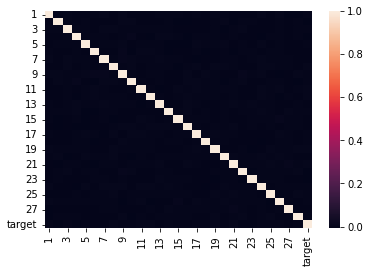

In [ ]:
#Heatmap of Correlation on randomly generated dataset

sns.heatmap(df.corr())

In [ ]:

#Distribution of randomly generated target data
df['target'].value_counts()

1    50022
0    49978
Name: target, dtype: int64

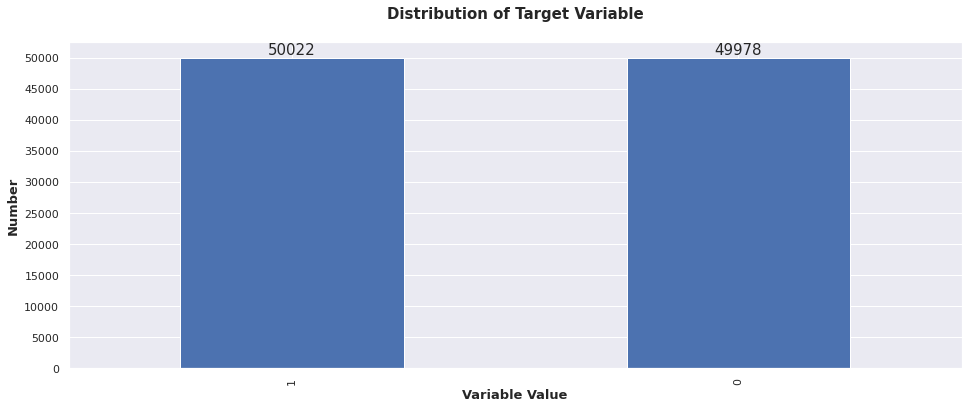

In [ ]:
sns.set_theme()
plt.title('Distribution of Target Variable\n', weight = 'bold' , fontsize = 15)
plt.xlabel('Variable Value', weight = 'bold' , fontsize = 13)
plt.ylabel('Number', weight = 'bold' , fontsize = 13)


ax = df['target'].value_counts().plot.bar(figsize=(16,6))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5_000))

for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.0f'),
                 (bar.get_x() + bar.get_width() / 2,
                  bar.get_height()), ha='center', va='center',
                  size=15, xytext=(0, 8),
                  textcoords='offset points')

**Just for fun: Check out the meshwork below lol**

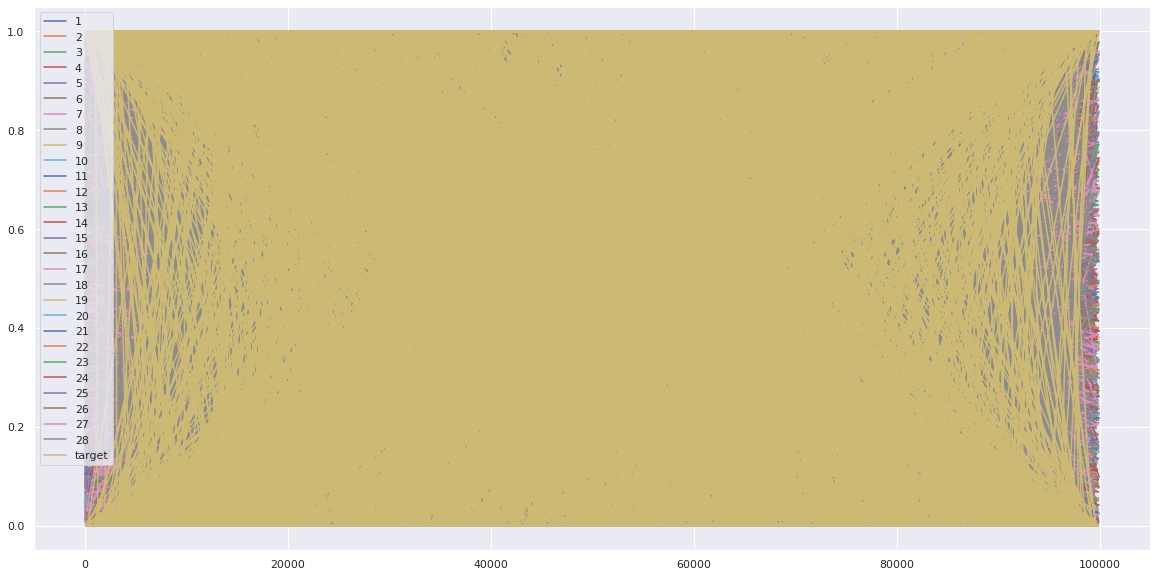

In [ ]:
#Just love the color
df.sample(5_000).plot.line(figsize=(20, 10))

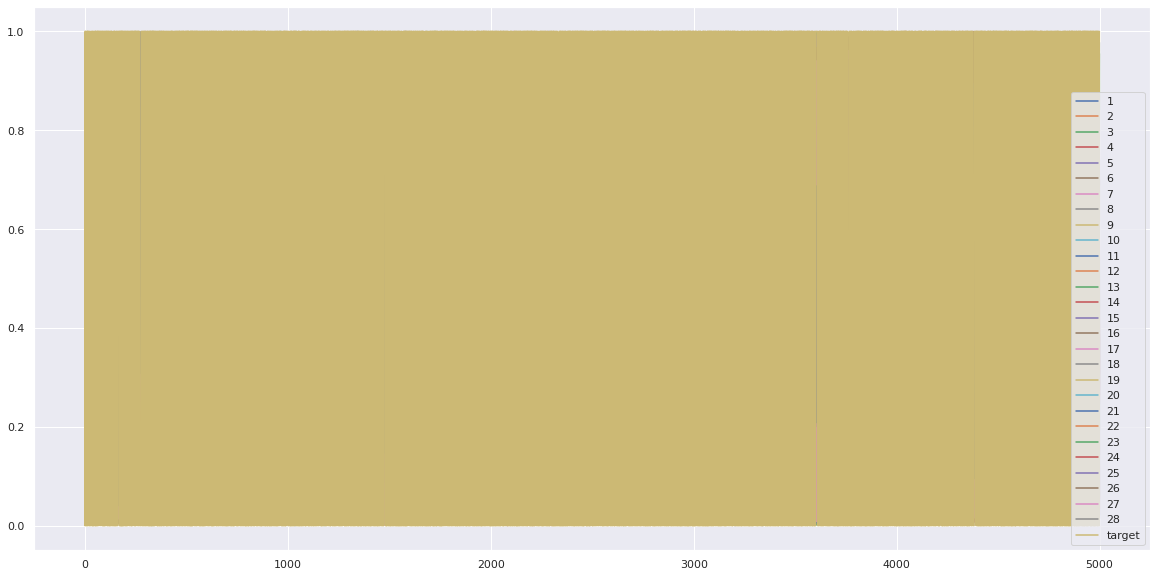

In [ ]:

#Just love the color
df.head(5_000).plot.line(figsize=(20, 10))

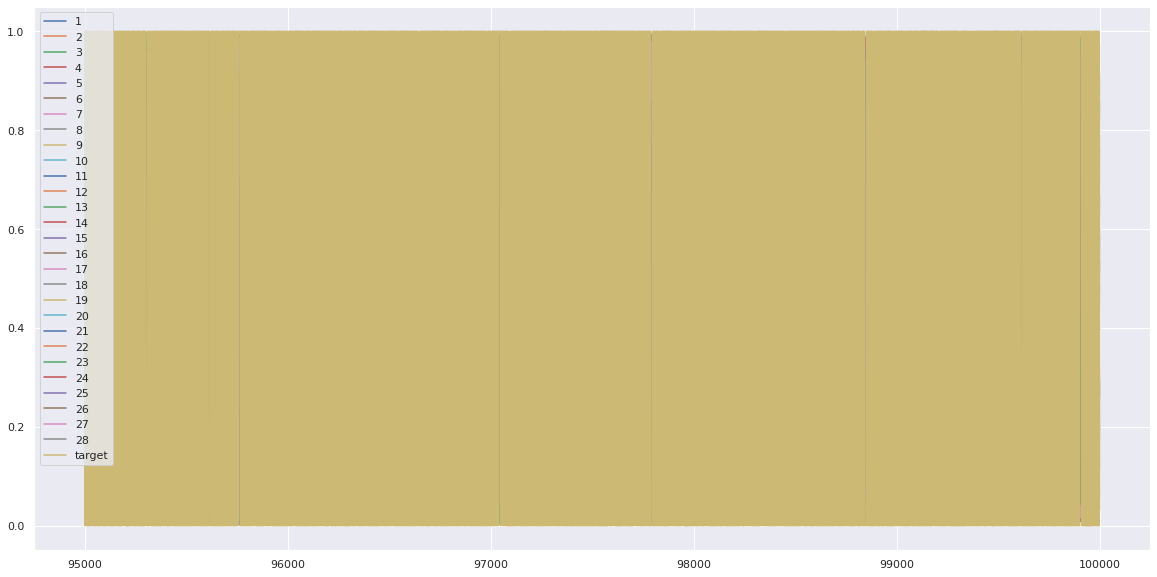

In [ ]:
#Just love the color
df.tail(5_000).plot.line(figsize=(20, 10))

In [ ]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size = 0.2)

In [ ]:
# Create and train a model (scikit-learn RandomForestClassifier in this case)
skl_model = RFC(n_estimators=10, max_depth=10)
skl_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
%%timeit
skl_model.predict(X_test)

10 loops, best of 5: 21.7 ms per loop


In [ ]:
# Use Hummingbird to convert the model to PyTorch
model = convert(skl_model, 'pytorch')
model

In [ ]:
%%timeit
# Run predictions on CPU
cpu_pred = model.predict(X_test)

The slowest run took 4.06 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 5: 32.9 ms per loop


In [ ]:
%%timeit
# Run predictions on GPU
model.to('cuda')
gpu_pred = model.predict(X_test)

The slowest run took 3139.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 4.63 ms per loop


In [ ]:
model

In [ ]:
# Save the model
model.save('hb_model')

In [ ]:
# Load the model back
model = load('hb_model')